In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.naive_bayes import BernoulliNB
import itertools
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 100)

In [2]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [3]:
data_amazon = "amazon_cells_labelled.txt"
amazon_raw = pd.read_csv(data_amazon, sep='\t', header=None)
amazon_raw.columns = ['sentence', 'score']

In [4]:
amazon_raw.head()

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [49]:
amazon_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
sentence     1000 non-null object
score        1000 non-null int64
great        1000 non-null bool
good         1000 non-null bool
quality      1000 non-null bool
recommend    1000 non-null bool
excellent    1000 non-null bool
best         1000 non-null bool
service      1000 non-null bool
price        1000 non-null bool
like         1000 non-null bool
nice         1000 non-null bool
works        1000 non-null bool
work         1000 non-null bool
dont         1000 non-null bool
really       1000 non-null bool
dtypes: bool(14), int64(1), object(1)
memory usage: 29.4+ KB


In [32]:
#https://stackoverflow.com/questions/34293875/how-to-remove-punctuation-marks-from-a-string-in-python-3-x-using-translate
word_dict = {}
punc_trans = str.maketrans('', '', string.punctuation)
num_trans = str.maketrans('', '', string.digits)
for sentence in amazon_raw['sentence']:
    words = [word.lower() \
             .translate(punc_trans) \
             .translate(num_trans) \
             .strip()
             for word in sentence.split(' ')]
    for word in words:
        word_dict[word] = word_dict.get(word, 0) + 1

In [33]:
word_series = pd.Series(word_dict)

In [47]:
occur_enough = word_series.sort_values(ascending=False)/word_series.sum() > .002

word_series[occur_enough].sort_values(ascending=False)

the          513
i            316
and          310
it           281
is           243
a            218
this         206
to           196
phone        162
my           143
             128
for          121
of           120
not          117
with         112
very         103
great         97
was           90
on            89
in            88
that          80
good          77
have          73
you           68
product       55
quality       49
had           48
headset       47
works         47
but           46
battery       45
as            45
its           43
so            42
are           42
all           41
use           41
sound         41
one           40
well          38
ear           35
has           34
work          34
would         34
from          33
your          32
dont          31
like          30
case          29
if            29
me            28
ive           28
than          28
be            28
after         27
time          27
price         27
excellent     27
up            

In [48]:
keywords = ['great', 'good', 'quality', 'recommend', 'excellent',
           'best', 'like', 'nice']
stretch_keys = ['great', 'good', 'quality', 'recommend', 'excellent',
           'best', 'service', 'price', 'like', 'nice', 'works', 'work',
               'dont', 'price', 'really', 'service']

for key in stretch_keys:
    amazon_raw[str(key)] = amazon_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False)

In [50]:
amazon_raw['score'] = (amazon_raw['score'] == 1)

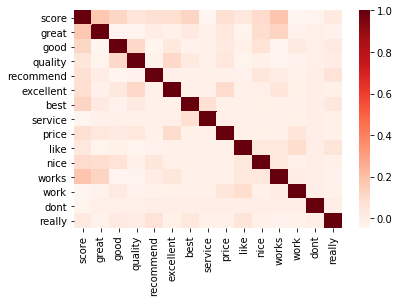

In [53]:
sns.heatmap(amazon_raw.corr(), cmap="Reds")

In [54]:
data_limited = amazon_raw[keywords]
data_stretch = amazon_raw[stretch_keys]
target = amazon_raw['score']

In [57]:
bnb_limited = BernoulliNB()
bnb_limited.fit(data_limited, target)
y_pred = bnb_limited.predict(data_limited)
print("Number of mislabeled points out of a total {} points : {}".format(
    data_limited.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 397


In [58]:
bnb_stretch = BernoulliNB()
bnb_stretch.fit(data_stretch, target)
y_pred = bnb_stretch.predict(data_stretch)
print("Number of mislabeled points out of a total {} points : {}".format(
    data_stretch.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 373


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
            data_limited, target, test_size=0.2, random_state=42)

In [86]:
list(itertools.combinations(stretch_keys, 2))

all_combos = [combo
    for combo in itertools.combinations(stretch_keys,i) 
                for i in range(len(stretch_keys))]

all_combos = [combo 
              for i in range(5, len(stretch_keys)+1)
              for combo in itertools.combinations(stretch_keys,i)]

In [87]:
all_combos

[('great', 'good', 'quality', 'recommend', 'excellent'),
 ('great', 'good', 'quality', 'recommend', 'best'),
 ('great', 'good', 'quality', 'recommend', 'service'),
 ('great', 'good', 'quality', 'recommend', 'price'),
 ('great', 'good', 'quality', 'recommend', 'like'),
 ('great', 'good', 'quality', 'recommend', 'nice'),
 ('great', 'good', 'quality', 'recommend', 'works'),
 ('great', 'good', 'quality', 'recommend', 'work'),
 ('great', 'good', 'quality', 'recommend', 'dont'),
 ('great', 'good', 'quality', 'recommend', 'price'),
 ('great', 'good', 'quality', 'recommend', 'really'),
 ('great', 'good', 'quality', 'recommend', 'service'),
 ('great', 'good', 'quality', 'excellent', 'best'),
 ('great', 'good', 'quality', 'excellent', 'service'),
 ('great', 'good', 'quality', 'excellent', 'price'),
 ('great', 'good', 'quality', 'excellent', 'like'),
 ('great', 'good', 'quality', 'excellent', 'nice'),
 ('great', 'good', 'quality', 'excellent', 'works'),
 ('great', 'good', 'quality', 'excellent', 

In [88]:
error_map = {}
for test_keywords in all_combos:
    data = amazon_raw[list(test_keywords)]
    bnb = BernoulliNB()
    bnb.fit(data, target)
    y_pred = bnb.predict(data)
    error_map[tuple(test_keywords)] = (target != y_pred).sum()
sorted(error_map.items(), key=lambda x:x[1], reverse=False)[0]

('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'like', 'works') 379
('great', 'good', 'quality', 'recommend', 'best', 'price', 'like', 'works') 377
('great', 'good', 'quality', 'recommend', 'best', 'price', 'nice', 'works') 379
('great', 'good', 'quality', 'recommend', 'best', 'like', 'works', 'price') 377
('great', 'good', 'quality', 'recommend', 'best', 'nice', 'works', 'price') 379
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works') 375
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'nice', 'works') 377
('great', 'good', 'recommend', 'excellent', 'best', 'like', 'nice', 'works') 378
('great', 'good', 'recommend', 'excellent', 'best', 'like', 'works', 'price') 375
('great', 'good', 'recommend', 'excellent', 'best', 'nice', 'works', 'price') 377
('great', 'good', 'recommend', 'best', 'price', 'like', 'nice', 'works') 377
('great', 'good', 'recommend', 'best', 'like', 'nice', 'works', 'price') 377
('great', 'good', 'quality', 'rec

('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'like', 'works', 'work', 'price') 376
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'like', 'works', 'dont', 'price') 374
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'like', 'works', 'dont', 'really') 379
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'like', 'works', 'dont', 'service') 379
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'like', 'works', 'price', 'really') 374
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'like', 'works', 'price', 'service') 374
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'like', 'works', 'really', 'service') 379
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'nice', 'works', 'work', 'price') 376
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'nice', 'works', 'dont', 'price') 376
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'nice', 'works',

('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'work', 'price') 377
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'work', 'really') 377
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'work', 'service') 377
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'dont', 'price') 375
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'dont', 'really') 375
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'dont', 'service') 375
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'price', 'really') 375
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'price', 'service') 375
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'really', 'service') 375
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'nice', 'works', 'work', 'dont') 

('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'price', 'like', 'nice', 'works', 'price') 371
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'price', 'like', 'nice', 'works', 'really') 371
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'price', 'like', 'nice', 'works', 'service') 371
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'work', 'dont') 376
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'work', 'price') 376
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'work', 'really') 376
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'work', 'service') 376
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'dont', 'price') 374
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'dont', 'really') 374
('gr

('great', 'good', 'quality', 'recommend', 'best', 'price', 'like', 'nice', 'works', 'work', 'really') 376
('great', 'good', 'quality', 'recommend', 'best', 'price', 'like', 'nice', 'works', 'work', 'service') 376
('great', 'good', 'quality', 'recommend', 'best', 'price', 'like', 'nice', 'works', 'dont', 'price') 374
('great', 'good', 'quality', 'recommend', 'best', 'price', 'like', 'nice', 'works', 'dont', 'really') 374
('great', 'good', 'quality', 'recommend', 'best', 'price', 'like', 'nice', 'works', 'dont', 'service') 374
('great', 'good', 'quality', 'recommend', 'best', 'price', 'like', 'nice', 'works', 'price', 'really') 374
('great', 'good', 'quality', 'recommend', 'best', 'price', 'like', 'nice', 'works', 'price', 'service') 374
('great', 'good', 'quality', 'recommend', 'best', 'price', 'like', 'nice', 'works', 'really', 'service') 374
('great', 'good', 'quality', 'recommend', 'best', 'price', 'like', 'works', 'work', 'dont', 'price') 379
('great', 'good', 'quality', 'recommend'

('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'work', 'dont', 'price') 377
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'work', 'dont', 'really') 377
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'work', 'dont', 'service') 377
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'work', 'price', 'really') 377
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'work', 'price', 'service') 377
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'work', 'really', 'service') 377
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'dont', 'price', 'really') 375
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'dont', 'price', 'service') 375
('great', 'good', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'dont', 'really', 'service') 375
('great', 'good'

('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'price', 'like', 'nice', 'works', 'work', 'service') 373
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'price', 'like', 'nice', 'works', 'dont', 'price') 371
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'price', 'like', 'nice', 'works', 'dont', 'really') 371
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'price', 'like', 'nice', 'works', 'dont', 'service') 371
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'price', 'like', 'nice', 'works', 'price', 'really') 371
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'price', 'like', 'nice', 'works', 'price', 'service') 371
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'price', 'like', 'nice', 'works', 'really', 'service') 371
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'price', 'like', 'works', 'work', 'dont', 'price') 376
('great', 'good', 'quality', 'recommend', 

('great', 'good', 'recommend', 'excellent', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'dont') 374
('great', 'good', 'recommend', 'excellent', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'price') 374
('great', 'good', 'recommend', 'excellent', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'really') 374
('great', 'good', 'recommend', 'excellent', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'service') 374
('great', 'good', 'recommend', 'excellent', 'best', 'service', 'price', 'like', 'nice', 'works', 'dont', 'price') 372
('great', 'good', 'recommend', 'excellent', 'best', 'service', 'price', 'like', 'nice', 'works', 'dont', 'really') 372
('great', 'good', 'recommend', 'excellent', 'best', 'service', 'price', 'like', 'nice', 'works', 'dont', 'service') 372
('great', 'good', 'recommend', 'excellent', 'best', 'service', 'price', 'like', 'nice', 'works', 'price', 'really') 372
('great', 'good', 'recommend', 'excellent', 'best

('great', 'good', 'recommend', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'dont', 'price') 379
('great', 'good', 'recommend', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'dont', 'really') 379
('great', 'good', 'recommend', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'dont', 'service') 379
('great', 'good', 'recommend', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'price', 'really') 379
('great', 'good', 'recommend', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'price', 'service') 379
('great', 'good', 'recommend', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'really', 'service') 379
('great', 'good', 'recommend', 'best', 'service', 'price', 'like', 'nice', 'works', 'dont', 'price', 'really') 377
('great', 'good', 'recommend', 'best', 'service', 'price', 'like', 'nice', 'works', 'dont', 'price', 'service') 377
('great', 'good', 'recommend', 'best', 'service', 'price', 'like', 'nice', 'wor

('great', 'good', 'quality', 'recommend', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'dont', 'price') 376
('great', 'good', 'quality', 'recommend', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'dont', 'really') 376
('great', 'good', 'quality', 'recommend', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'dont', 'service') 376
('great', 'good', 'quality', 'recommend', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'price', 'really') 376
('great', 'good', 'quality', 'recommend', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'price', 'service') 376
('great', 'good', 'quality', 'recommend', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'really', 'service') 376
('great', 'good', 'quality', 'recommend', 'best', 'service', 'price', 'like', 'nice', 'works', 'dont', 'price', 'really') 374
('great', 'good', 'quality', 'recommend', 'best', 'service', 'price', 'like', 'nice', 'works', 'dont', 'price', 'servi

('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'dont', 'price') 373
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'dont', 'really') 373
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'dont', 'service') 373
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'price', 'really') 373
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'price', 'service') 373
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'service', 'price', 'like', 'nice', 'works', 'work', 'really', 'service') 373
('great', 'good', 'quality', 'recommend', 'excellent', 'best', 'service', 'price', 'like', 'nice', 'works', 'dont', 'price', 'really') 371
('great', 'good', 'quality'

In [116]:
greedy_list = []
best_error_rate = 1000
test_keys = stretch_keys.copy()
for i in range(len(stretch_keys)):
    best_add = None
    for keyword in test_keys:
        test_list = greedy_list.copy()
        test_list.append(keyword)
        data = amazon_raw[test_list]
        bnb = BernoulliNB()
        bnb.fit(data, target)
        y_pred = bnb.predict(data)
        error_rate = (target != y_pred).sum()
        if error_rate < best_error_rate:
            best_add, best_error_rate = keyword, error_rate
    if best_add == None:
        break
    else:
        test_keys.remove(best_add)
        greedy_list.append(best_add)
print(greedy_list, best_error_rate)

['great', 'good', 'works', 'best', 'recommend', 'price', 'like', 'excellent', 'nice', 'quality'] 371


In [126]:
greedy_list = []
best_error_rate = 1000
test_keys = stretch_keys.copy()
for i in range(len(stretch_keys)):
    best_add = None
    for keyword in test_keys:
        test_list = greedy_list.copy()
        test_list.append(keyword)
        data = amazon_raw[test_list]
        X_train, X_test, y_train, y_test = train_test_split(
            data, target, test_size=0.2, random_state=42)
        bnb = BernoulliNB()
        bnb.fit(X_train, y_train)
        y_pred = bnb.predict(X_test)
        error_rate = (y_test != y_pred).sum()
        if error_rate < best_error_rate:
            best_add, best_error_rate = keyword, error_rate
    if best_add == None:
        break
    else:
        test_keys.remove(best_add)
        greedy_list.append(best_add)
print(greedy_list, best_error_rate)

['good', 'works', 'quality', 'recommend', 'price', 'best'] 71
